<h1>Feature Selection</h1>
<p>Finding relationships between features
<p>Feature selection using wrappers

<h2>What's the Purpose of Feature Selection</h2>
<p>Many learning algorithms perform poorly on high-dimensional data. This is known as the <b>curse of dimensionality</b>
    <p>There are other reasons we may wish to reduce the number of features including:
        <p>1. Reducing computational cost
            <p>2. Reducing the cost associated with data collection
                <p>3. Improving Interpretability

<h2>Dataset: Boston Housing Data</h2>

<p><b>Dependent Variable: MEDV:</b> Median value of owner-occupied homes in 1000's of dollars
<p><b>Explanatory Variables</b></p>
<p><b>CRIM:</b> per capita crime rate by town
<p><b>ZN:</b> proportion of residential land zoned for lots over 25,000 sq.ft.
<p><b>INDUS:</b> proportion of non-retail business acres per town
<p><b>CHAS:</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
<p><b>NOX:</b> nitric oxides concentration (parts per 10 million)
<p><b>RM:</b> average number of rooms per dwelling
<p><b>AGE:</b> proportion of owner-occupied units built prior to 1940
<p><b>DIS:</b> weighted distances to five Boston employment centres
<p><b>RAD:</b> index of accessibility to radial highways
<p><b>TAX:</b> full-value property-tax rate per 10,000 dollars
<p><b>PTRATIO:</b>  pupil-teacher ratio by town
<p><b>B:</b> 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town
<p><b>LSTAT:</b> lower status of the population


In [1]:
from sklearn.datasets import load_boston

In [2]:
boston_data=load_boston()

In [3]:
import pandas as pd

In [4]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
dummies = pd.get_dummies(boston.RAD)
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,...,28.7,0,0,1,0,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,...,22.9,0,0,0,0,1,0,0,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,...,27.1,0,0,0,0,1,0,0,0,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,...,16.5,0,0,0,0,1,0,0,0,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,...,18.9,0,0,0,0,1,0,0,0,0


<h2>Last Time</h2>

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, random_state=0, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

D:\InstallationFolder\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RMSE: 6.51
R_squared: 0.5


<h2>Filter Features by Variance</h2>

In [7]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

In [8]:
X = X.drop(columns = ['NOX','CHAS'])

In [9]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 6.28
R_squared: 0.53


<h2>Filter Features by Correlation</h2>

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

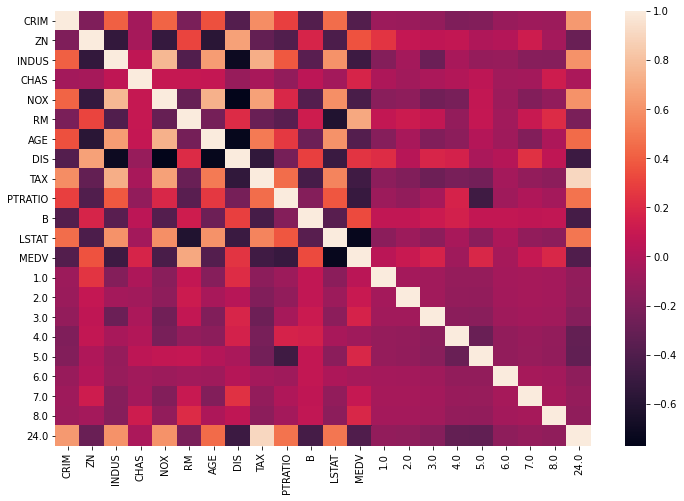

In [11]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(boston.corr(), ax=ax)
plt.show()

In [12]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [39]:
abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"])>0.5].drop('MEDV')).index.tolist()

# 0.5 er upor 3 Ta correlation ache...strong correlation

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'RM*LSTAT', 'LSTAT_2']

In [14]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features = abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"])>val].drop('MEDV')).index.tolist()
    
    X = boston.drop(columns='MEDV')
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 2.0, 3.0, 5.0, 8.0, 24.0]
RMSE: 6.47
R_squared: 0.5
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE: 5.27
R_squared: 0.67
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE: 5.42
R_squared: 0.65
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
RMSE: 4.89
R_squared: 0.72
['RM', 'PTRATIO', 'LSTAT']
RMSE: 4.73
R_squared: 0.74
['RM', 'LSTAT']
RMSE: 4.8
R_squared: 0.73
['LSTAT']
RMSE: 5.7
R_squared: 0.61


<h2>Feature Selection Using a Wrapper</h2>

In [27]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston['RAD'] = boston['RAD'].astype('category')
dummies = pd.get_dummies(boston.RAD)
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [29]:
sfs1 = SFS(classifier_pipeline, 
           k_features=1, 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv)

X = boston.drop(columns='MEDV')

sfs1.fit(X,y)

sfs1.subsets_

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([ -20.01483529,  -38.77619216,  -19.22183529,  -66.60270392,
          -59.90746667,  -61.32327843,  -15.753274  , -107.234396  ,
          -20.92415   ,  -13.922834  ]),
  'avg_score': -42.36809657647059,
  'feature_names': ('CRIM',
   'ZN',
   'INDUS',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT',
   1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   24.0)},
 20: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   20),
  'cv_scores': array([ -20.01483529,  -19.49721765,  -19.22183529,  -74.59283333,
          -44.45047059,  -53.63635098,  -15.796332  , -106.83866   ,
          -20.92415   ,  -13.922834  ]),
  'avg_score': -38.8895519137255,
  'feature_names': ('C

In [30]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.458
R_squared: 0.765


In [31]:
boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']].corr()

,CRIM,RM,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.219247,0.289946,0.455621,-0.388305
RM,-0.219247,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.289946,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.455621,-0.613808,0.374044,1.000000,-0.737663
MEDV,-0.388305,0.695360,-0.507787,-0.737663,1.000000


In [32]:
boston['RM*LSTAT']=boston['RM']*boston['LSTAT']

In [33]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.458
R_squared: 0.765


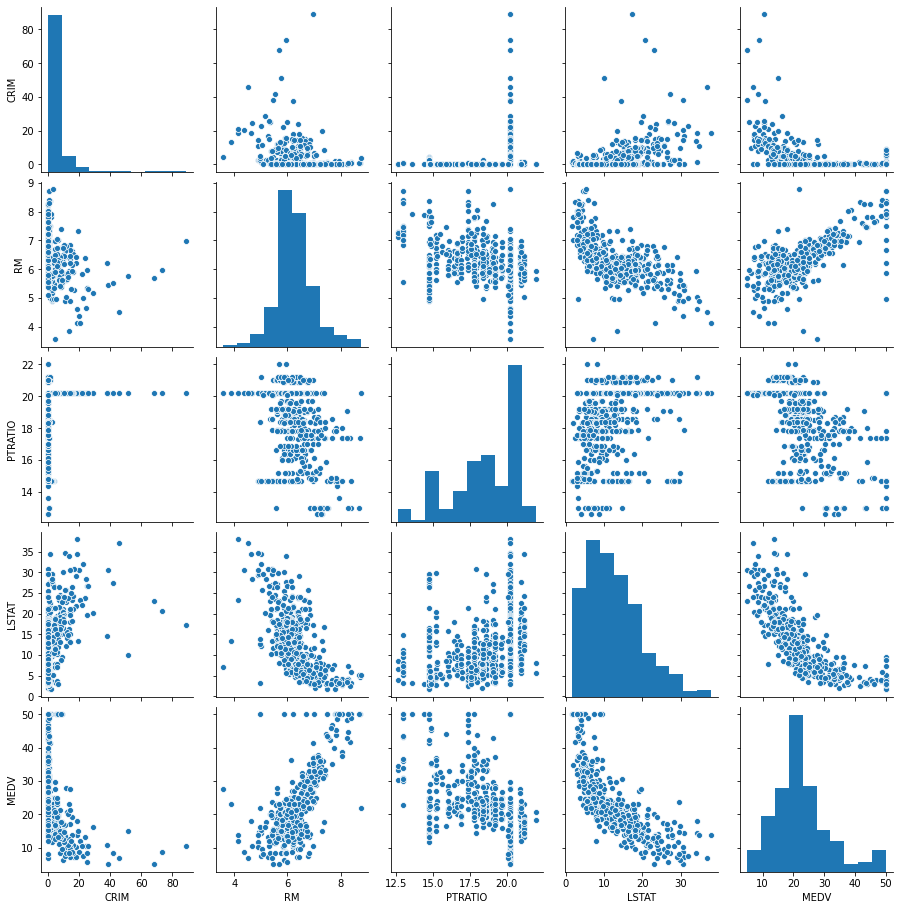

In [34]:
sn.pairplot(boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']])

In [35]:
boston = boston.drop(boston[boston['MEDV']==boston['MEDV'].max()].index.tolist())

In [36]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT','RM*LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.509
R_squared: 0.801


In [37]:
boston['LSTAT_2']=boston['LSTAT']**2

In [40]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.548
R_squared: 0.796
